# Probability distributions & meteor shower gazing


**Our goals for today:**
- Discuss some key statistics topics: samples versus populations and empirical versus theorectical distributions
- Simulate a head/tail coin toss and well drilling i.e. Binomial distribution
- Simulate meteors entering Earth's atmosphere i.e. Poisson distribution
- Simulate geomagnetic polarity reversals i.e. Gamma distribution
- Use Gutenberg-Richter to assess earthquake probability


## Setup

Run this cell as it is to setup your environment.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import factorial
np.random.seed(0)

## Flipping a coin

Let's pretend we are flipping a coin 10 times using ```np.random.choice([0, 1])```. How many times will be get heads? 1 is heads, 0 is tails. Let's use a for loop and get Python to simulate such a coin flip scenario for us.

This code block is the first time we are using a **for loop**. What **for loops** do is take a chunk of code (in Python the chunk that is indented) being run multiple times. In this case, the code will get looped through 10 times -- specified by ```range(0,10)```.

In [2]:
for flip in range(0,10):
    flip_result = np.random.choice([0, 1])
    print(flip_result)

0
1
1
0
1
1
1
1
1
1


Now let's record how many times the result was heads. We will make a list called `flip_results` and have it be blank to start. Each time we go through the code we will append the result to the list:

In [3]:
flip_results = []

for flip in range(0,10):
    flip_result = np.random.choice([0, 1])
    flip_results.append(flip_result)
    
flip_results    

[1, 0, 0, 1, 0, 0, 0, 0, 0, 1]

We can calculate how many times were heads by taking the sum of the list:

In [4]:
#write code here

number_heads = sum(flip_results)

Now let's flip the coin 10 times and do that 10 times. Each time we flip it, let's record how many heads resulted from the flip.

In [5]:
number_heads = []

for flip_experiment in range(10):

    flip_results = []
    
    for flip in range(0,10):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)
    
    number_heads.append(sum(flip_results))

number_heads

[6, 6, 7, 6, 3, 5, 7, 5, 4, 3]

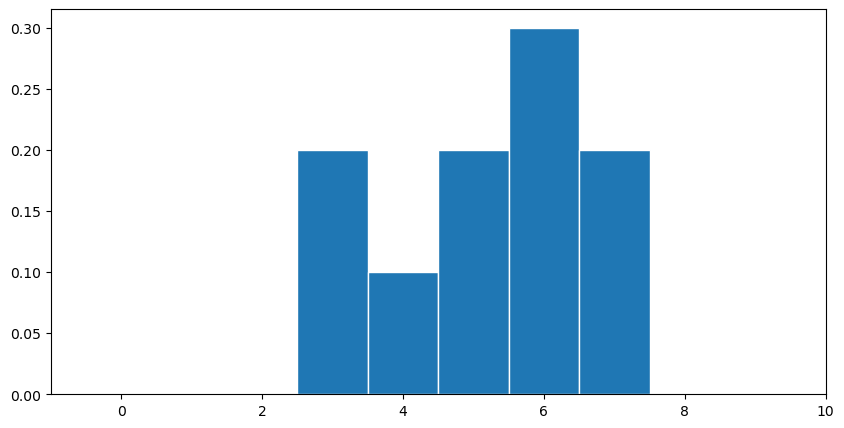

In [6]:
plt.figure(figsize=(10,5))
bins = np.arange(-0.5, 10.5, 1)
plt.hist(number_heads, bins=bins, density=True, edgecolor='white')
plt.show()

<font color=goldenrod>**_Code for you to write_**</font>

Instead of doing 10 coin flips 10 times, do 10 coin flips 1000 times. Plot the histogram of the result.

In [35]:
number_heads = []

for flip_experiment in range(1000):
    
    flip_results = []
    
    for flip in range(0,10):
        flip_result = np.random.choice([0, 1])
        flip_results.append(flip_result)
    
    number_heads.append(sum(flip_results))

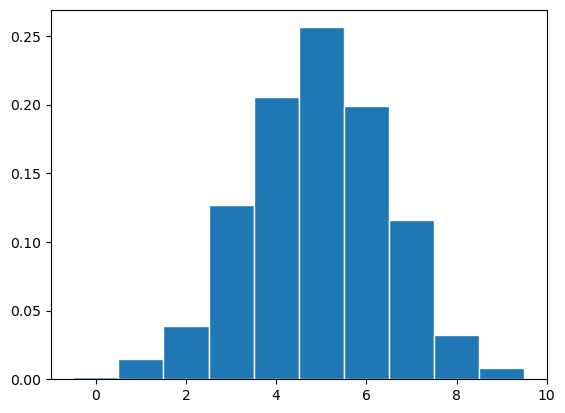

In [36]:
plt.figure()
plt.hist(number_heads, bins=np.arange(-0.5, 10.5, 1), density=True, edgecolor='white')
plt.show()

## Binomial distribution:

### Theoretical

A relatively straight-forward distribution is the _binomial_ distribution which describes the probability of a particular outcome when there are only two possibilities (yes or no, heads or tails, 1 or 0).

For example, in a coin toss experiment (heads or tails), if we flip the coin  $n$ times, what is the probability of getting $x$ 'heads'?  We assume that the probability $p$ of a head for any given coin toss is 50%; put another way $p$ = 0.5.  

The binomial distribution can be described by an equation: 

$$P=f(x,p,n)= \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}$$

We can look at this kind of distribution by evaluating the probability for getting $x$ 'heads' out of $n$ attempts. We'll code the equation as a function, and calculate the probability $P$ of a particular outcome (e.g., $x$ heads in $n$ attempts). 

Note that for a coin toss, $p$ is 0.5, but other yes/no questions can be investigated as well (e.g., chance of finding a fossil in a sedimentary layer; whether or not a landslide occurs following an earthquake). 

In [7]:
def binomial_probability(x,p,n):
    """
    This function computes the probability of getting x particular outcomes (heads) in n attempts, where p is the 
    probability of a particular outcome (head) for any given attempt (coin toss).
    
    Parameters
    ----------
    x : number of a particular outcome
    p : probability of that outcome in a given attempt
    n : number of attempts
    
    Returns
    ---------
    prob : probability of that number of the given outcome occuring in that number of attempts
    """

    ## prop = n!/(x!(n-x)!)*p^x*(1-p)^(n-x)
    prob = factorial(n)/(factorial(x)*factorial(n-x))*(p**x)*((1-p)**(n-x))

    return prob

We can use this function to calculate the probability of getting 10 heads ($x=10$) when there are 10 coin tosses ($n=10$) given with the $p$ (probability) of 0.5.  

In [8]:
binomial_probability(x=10,p=0.5,n=10)

0.0009765625

Let's calculate the probability of getting [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10] heads.

In [9]:
head_numbers = np.arange(0,11)
head_numbers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
prob_heads = 0.5
n_flips = 10
probabilities = []

for head_number in head_numbers:
    prob = binomial_probability(x=head_number,p=prob_heads,n=n_flips)
    probabilities.append(prob)
    
probabilities

[0.0009765625,
 0.009765625,
 0.0439453125,
 0.1171875,
 0.205078125,
 0.24609375,
 0.205078125,
 0.1171875,
 0.0439453125,
 0.009765625,
 0.0009765625]

<font color=goldenrod>**_Code for you to write_**</font>

Make a plot where you both plot the histogram from 1000 coin flips (using ```plt.hist()``` with ```density=True```) and you plot the results head_numbers probabilities (using ```plt.plot()```).

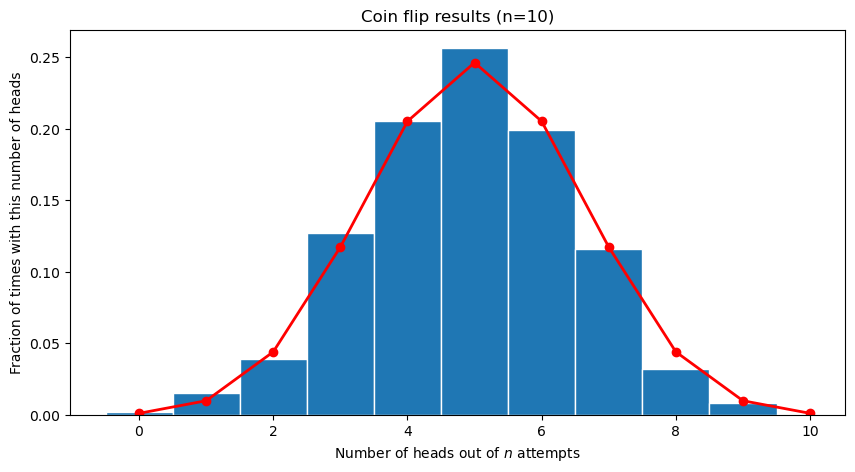

In [37]:
plt.figure(figsize=(10,5))
bins = np.arange(-0.5, 10.5, 1)
plt.hist(number_heads, bins=bins, density=True, edgecolor='white')
plt.plot(head_numbers, probabilities, 'o-', color='red', lw=2)

plt.xlabel('Number of heads out of $n$ attempts') # add labels
plt.ylabel('Fraction of times with this number of heads') 

plt.title('Coin flip results (n=10)');

Hopefully what we should see is that number of coin flips from our random samples matches the theoritical probability distribution pretty well. The more flip experiments we numerically take, the better it should match.

### Empirical

The type of sampling we were doing above where we were flipping coins is called a _Monte Carlo simulation_. We can use simulate data from all sorts of distributions. Let's keep focusing on the binomial distribution and look at using the ```np.random.binomial``` function.

In [12]:
help(np.random.binomial)

Help on built-in function binomial:

binomial(...) method of numpy.random.mtrand.RandomState instance
    binomial(n, p, size=None)
    
    Draw samples from a binomial distribution.
    
    Samples are drawn from a binomial distribution with specified
    parameters, n trials and p probability of success where
    n an integer >= 0 and p is in the interval [0,1]. (n may be
    input as a float, but it is truncated to an integer in use)
    
    .. note::
        New code should use the `~numpy.random.Generator.binomial`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    n : int or array_like of ints
        Parameter of the distribution, >= 0. Floats are also accepted,
        but they will be truncated to integers.
    p : float or array_like of floats
        Parameter of the distribution, >= 0 and <=1.
    size : int or tuple of ints, optional
        Output shape.  If the given 

`np.random.binomial( )` requires 2 parameters, $n$ and $p$, with an optional keyword argument `size` (if `size` is not specified, it returns a single trial). We could have used this function earlier to get the number of heads that were flipped, but the way we did it also worked.

Let's follow the example the is given in the `np.random.binomial( )` docstring.

A company drills 9 wild-cat oil exploration wells (high risk drilling in unproven areas), each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening? *Note that success in this context means that liquid hydocarbons came out of the well. In reality, you may not consider this a success given that the result is that more hydrocarbons will be combusted as a result, leading to higher atmospheric carbon dioxide levels and associated global warming.*

If we do ```np.random.binomial(9, 0.1, 100)``` we will get a list of 100 values that represent the number of wells that yielded oil when there is a 10% (p = 0.1) chance of each individual well yielding oil.

In [13]:
np.random.binomial(9, 0.1, 100)

array([0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 3, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 3,
       0, 1, 1, 1, 0, 3, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2,
       1, 4, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0])

In [14]:
np.random.binomial(9, 0.1, 100) == 0

array([False, False, False, False, False, False,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True, False, False,
        True, False,  True, False, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True])

In [15]:
np.sum(np.random.binomial(9, 0.1, 100) == 0)

46

We can write a function that uses this process to simulate fraction of times that there no successful wells for a given number of wells, a given probability and a given number of simulations;

In [16]:
def wildcat_failure_rate(n_wells,prob,n_simulations):
    '''
    Simulate the number of times that there are no successful wells for a given number of wells and a given probability for each well.
    
    Parameters
    ----------
    n_wells : number of wells drilled in each simulation
    prob : probability that each well will be successful
    n_simulations : number of times that drilling n_wells is simulated
    '''
    
    simulations = np.random.binomial(n_wells, prob, n_simulations)
    num_failures = np.sum(simulations == 0)
    failure_rate = num_failures/n_simulations

    return failure_rate

<font color=goldenrod>**Put the `wildcat_failure_rate` function to use**</font>

Use the function to simulate the failure rate for the above scenario (9 wells drilled, 0.1 probability of success for each well) and do it for 10 simulations

In [17]:
failure_rate = wildcat_failure_rate(9,0.1,10)

print(f"The failure rate is {failure_rate:.2f}")

The failure rate is 0.10


<font color=goldenrod>**Put the `wildcat_failure_rate` function to use**</font>

Use the function to simulate the failure rate for the same scenario for 1000 simulations

In [18]:
failure_rate = wildcat_failure_rate(9,0.1,1000)

print(f"The failure rate is {failure_rate:.2f}")

The failure rate is 0.39


<font color=goldenrod>**Put the `wildcat_failure_rate` function to use**</font>

Use the function to simulate the failure rate for 100,000 simulations

In [19]:
failure_rate = wildcat_failure_rate(9,0.1,100000)

print(f"The failure rate is {failure_rate:.2f}")

The failure rate is 0.39


<font color=goldenrod>**Put the `binomial_probability` function to use**</font>

In the examples above we are simulating the result. Instead we could use the binomial_probability distribution to calculate the probability. Go ahead and do this for this wildcat drilling example. 

In [20]:
failure_rate = binomial_probability(x=0,p=0.1,n=9)

print(f"The failure rate is {failure_rate:.2f}")

The failure rate is 0.39


**How well does the calculated binomial_probability match the simulated wildcat_failure rates? How many times do you need to simulate the problem to get a number that matches the theoretical probability?** 

*Write your answer here*

## Poisson distribution:

A Poisson Distribution gives the probability of a number of events in an interval generated by a Poisson process: the average time between events is known, but the exact timing of events is random. The events must be independent and may occur only one at a time.

Within Earth and Planetary Science there are many processes that approximately meet this criteria.

### Theoretical

The Poisson distribution gives the probability that an event (with two possible outcomes) occurs $k$ number of times in an interval of time where $\lambda$ is the expected rate of occurance. The Poisson distribution is the limit of the binomial distribution for large $n$. So if you take the limit of the binomial distribution as $n \rightarrow \infty$ you'll get the Poisson distribution:

$$P(k) = e^{-\lambda}\frac{\lambda^{k}}{k!}$$


In [21]:
def poisson_probability(k,lam):
    """
    This function computes the probability of getting k particular outcomes when the expected rate is lam.
    """
    
    # compute the poisson probability of getting k outcomes when the expected rate is lam
    prob = (np.exp(-1*lam))*(lam**k)/factorial(k)
    
    #return the output
    return prob

## Observing meteors

<img src="./images/AMS_TERMINOLOGY.png" width = 600>

From https://www.amsmeteors.org/meteor-showers/meteor-faq/:

> **How big are most meteoroids? How fast do they travel?** The majority of visible meteors are caused by particles ranging in size from about that of a small pebble down to a grain of sand, and generally weigh less than 1-2 grams. Those of asteroid origin can be composed of dense stony or metallic material (the minority) while those of cometary origin (the majority) have low densities and are composed of a “fluffy” conglomerate of material, frequently called a “dustball.” The brilliant flash of light from a meteor is not caused so much by the meteoroid’s mass, but by its high level of kinetic energy as it collides with the atmosphere.

> Meteors enter the atmosphere at speeds ranging from 11 km/sec (25,000 mph), to 72 km/sec (160,000 mph!). When the meteoroid collides with air molecules, its high level of kinetic energy rapidly ionizes and excites a long, thin column of atmospheric atoms along the meteoroid’s path, creating a flash of light visible from the ground below. This column, or meteor trail, is usually less than 1 meter in diameter, but will be tens of kilometers long.

> The wide range in meteoroid speeds is caused partly by the fact that the Earth itself is traveling at about 30 km/sec (67,000 mph) as it revolves around the sun. On the evening side, or trailing edge of the Earth, meteoroids must catch up to the earth’s atmosphere to cause a meteor, and tend to be slow. On the morning side, or leading edge of the earth, meteoroids can collide head-on with the atmosphere and tend to be fast.

> **What is a meteor shower? Does a shower occur “all at once” or over a period of time?** Most meteor showers have their origins with comets. Each time a comet swings by the sun, it produces copious amounts of meteoroid sized particles which will eventually spread out along the entire orbit of the comet to form a meteoroid “stream.” If the Earth’s orbit and the comet’s orbit intersect at some point, then the Earth will pass through this stream for a few days at roughly the same time each year, encountering a meteor shower. The only major shower clearly shown to be non-cometary is the Geminid shower, which share an orbit with the asteroid (3200 Phaethon): one that comes unusually close to the sun as well as passing through the earth’s orbit. Most shower meteoroids appear to be “fluffy”, but the Geminids are much more durable as might be expected from asteroid fragments.

## Observing the Southern Taurids meteor shower

Let's say you are planning a camping trip to go out try to see shooting stars next Fall in a rural location. You are looking at a date in October and that there is an active shower:

> **Southern Taurids**

> *Active from September 28th to December 2, 2021. The peak is November 4-5, 2021*

> The Southern Taurids are a long-lasting shower that reaches a barely noticeable maximum on October 9 or 10. The shower is active for more than two months but rarely produces more than five shower members per hour, even at maximum activity. The Taurids (both branches) are rich in fireballs and are often responsible for increased number of fireball reports from September through November. https://www.amsmeteors.org/meteor-showers/meteor-shower-calendar/

At a rate of 5 observed meteors per hour, what is the probability of observing 6?

We can use the Poisson probability function to answer this question:

In [22]:
lamb = 5
k = 6
prob = poisson_probability(k,lamb)
print(f"The probability of getting {k} outcomes when the expected rate is {lamb} is {prob:.2f}")

The probability of getting 6 outcomes when the expected rate is 5 is 0.15


So that result tells us that there is a 14.6% chance of observing exactly 6, but it would be much more helpful to be able to visualize the probability distribution. So let's go through and calculate the probability of seeing any number between 0 and 10. First, we can make an array between 0 and 11:

In [23]:
number_meteors_seen = np.arange(0,11)
number_meteors_seen

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [45]:
taurid_meteor_sighting_probability = []
taurid_meteor_rate = 5

for n in number_meteors_seen:
    prob = poisson_probability(number_meteors_seen[n],taurid_meteor_rate)
    taurid_meteor_sighting_probability.append(prob)

In [46]:
taurid_meteor_sighting_probability

[0.006737946999085467,
 0.03368973499542734,
 0.08422433748856833,
 0.14037389581428056,
 0.1754673697678507,
 0.1754673697678507,
 0.1462228081398756,
 0.104444862957054,
 0.06527803934815875,
 0.03626557741564375,
 0.01813278870782187]

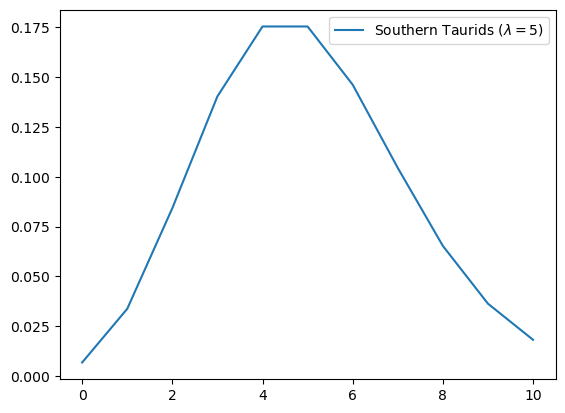

In [47]:
plt.figure()
plt.plot(number_meteors_seen,taurid_meteor_sighting_probability,label='Southern Taurids ($\lambda = 5$)')
plt.legend()
plt.show()

When there is not an active shower the background meteor rate is about 2 an hour (although it is variable depending on time of night and season; see more here: https://www.amsmeteors.org/meteor-showers/meteor-faq/).

<font color=goldenrod>**_Code for you to write_**</font>

- **Calculate the probability of seeing different numbers of meteors when the background rate is 2 an hour (lambda = 2).**
- **Plot these probabilities alongside the probability of seeing those same numbers during the Southern Taurids shower.**

In [48]:
background_sighting_probability = []
background_meteor_rate = 2

for n in number_meteors_seen:
    prob = poisson_probability(number_meteors_seen[n],background_meteor_rate)
    background_sighting_probability.append(prob)

background_sighting_probability


[0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.1804470443154836,
 0.0902235221577418,
 0.03608940886309672,
 0.012029802954365574,
 0.0034370865583901638,
 0.0008592716395975409,
 0.00019094925324389798,
 3.8189850648779595e-05]

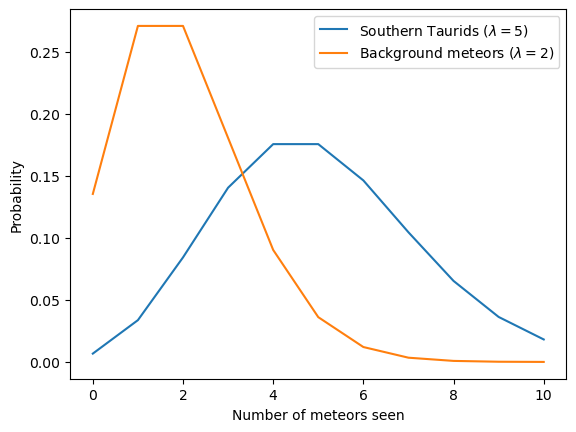

In [49]:
plt.figure()
plt.plot(number_meteors_seen,taurid_meteor_sighting_probability,label='Southern Taurids ($\lambda = 5$)')
plt.plot(number_meteors_seen,background_sighting_probability,label='Background meteors ($\lambda = 2$)')
plt.ylabel('Probability')
plt.xlabel('Number of meteors seen')
plt.legend()
plt.show()

## Simulate meteor observing

There are many cases where it can be useful to simulate data sets. In this case, one could simulate what your experience could be in terms of the number of hours you could spend looking at the night sky and seeing 1 meteor or more on a normal night vs. a night with the Southern Taurids shower ongoing.

We can use the `np.random.poisson` function to simulate 'realistic' data.  

`np.random.poisson( )` requires 1 parameter `lam` and an optional parameter `size`.  Each call to `np.random.poisson( )` returns `size` number of draws from a Poisson distribution with $\lambda =$ `lam`.

Let's try it with $\lambda = 2$ (the background rate).

In [28]:
lam = 2
number_hours_watched = 100
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched

print(f"The fraction of hours watched with a meteor sighting is {fraction_w_sighting*100:.2f}%")

The fraction of hours watched with a meteor sighting is 83.00%


- **Do the same meteor watching simulation with $\lambda = 5$ (the Southern Taurids rate). Do it for 10 hours, 100 hours, 100,000 hours.** 

In [29]:
lam = 5
number_hours_watched = 10
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched

print(f"The percent of hours watched with a meteor sighting is {fraction_w_sighting*100:.2f}%")

The fraction of hours watched with a meteor sighting is 100.00%


In [30]:
lam = 5
number_hours_watched = 100
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched

print(f"The percent of hours watched with a meteor sighting is {fraction_w_sighting*100:.2f}%")

The fraction of hours watched with a meteor sighting is 98.00%


In [31]:
lam = 5
number_hours_watched = 100000
number_hours_w_meteor_sighting = []

for n in np.arange(0,number_hours_watched):
    number_meteors = np.random.poisson(lam)
    if number_meteors >= 1:
        number_hours_w_meteor_sighting.append(1)
        
fraction_w_sighting = len(number_hours_w_meteor_sighting)/number_hours_watched

print(f"The percent of hours watched with a meteor sighting is {fraction_w_sighting*100:.2f}%")

The fraction of hours watched with a meteor sighting is 99.34%


### Extension: Earthquake Probability

The occurrence of earthquakes is also a Poisson process, events occur randomly in time, and the average recurrence can be determined from Gutenberg-Richter. 

The Gutenberg-Richter statistic which gives the annual rate of earthquakes above a given magnitude.

Assumeing the Gutenberg-Richter relationshipfor the San Franciso Bay Area: log10(N)= 3.266 - 0.797M, for each year.

Let's apply the Poisson distribution to this problem. 

So $\lambda = N * {\Delta}time$, where N is the annual rate. It is common to consider ${\Delta}time=30 yrs$. Why is that?

Use the Poisson's distribution to find the probability of 0 to 9 M5 events in a 30 year period.

The expected number of M5 earthquakes in a year is 0.19


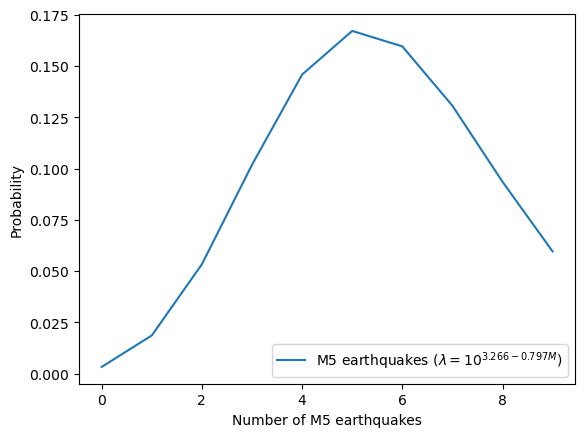

In [53]:
# Calculate the number of M5 earthquakes
M = 5
logN = 3.266 - 0.797 * M
N = 10**logN
print(f"The expected number of M5 earthquakes in a year is {N:.2f}")

# Calculate the probability of observing at least 0-9 M5 earthquake in a year
lam = N * 30

number_m5_earthquakes = np.arange(0,10)

m5_earthquake_probability = []

for n in number_m5_earthquakes:
    prob = poisson_probability(n,lam)
    m5_earthquake_probability.append(prob)

plt.figure()
plt.plot(number_m5_earthquakes,m5_earthquake_probability,label='M5 earthquakes ($\lambda = 10^{3.266-0.797M}$)')
plt.ylabel('Probability')
plt.xlabel('Number of M5 earthquakes')
plt.legend()
plt.show()


How does the probability change with the number of events? How does that reconcile with the rate of M5 earthquakes?

### Poisson Probability of 1 or more earthquakes

The Poisson probability of zero events has an interesting use in characterizing earthquake hazard.

$P(k=0)=e^{-\lambda}$

The complement of the zero event probability is the probability of 1 or more earthquakes occuring in the period of time. It is this probability that is used in earthquake forecast reports. The probability of one or more events is written as; 

$P(k >= 1) = 1 - e^{-\lambda}$

Determine the probability of 1 or more M4, M5, M6 and M7 in a 30 year period.


In [55]:
for M in [4, 5, 6, 7]:
    logN = 3.266 - 0.797 * M
    N = 10**logN

    lam = N * 30
    prob0 = poisson_probability(0,lam)
    prob = 1 - prob0

    print(f"The probability of observing at least one M{M} earthquake in a year is {prob:.2f}") 

The probability of observing at least one M4 earthquake in a year is 1.00
The probability of observing at least one M5 earthquake in a year is 1.00
The probability of observing at least one M6 earthquake in a year is 0.60
The probability of observing at least one M7 earthquake in a year is 0.14


How do the probabilities change if a 10 year period is considered?


In [56]:
for M in [4, 5, 6, 7]:
    logN = 3.266 - 0.797 * M
    N = 10**logN

    lam = N * 10
    prob0 = poisson_probability(0,lam)
    prob = 1 - prob0

    print(f"The probability of observing at least one M{M} earthquake in a year is {prob:.2f}") 

The probability of observing at least one M4 earthquake in a year is 1.00
The probability of observing at least one M5 earthquake in a year is 0.85
The probability of observing at least one M6 earthquake in a year is 0.26
The probability of observing at least one M7 earthquake in a year is 0.05
